In [1]:
import matplotlib.pyplot as plt
import requests
import numpy as np
import pandas as pd
import datetime

from citipy import citipy
from pprint import pprint
from config import api_key

In [2]:
# need to create 500 lat and lon pair pounts.
# in this homework, i just want to find European citys. thats why my lat is between 40-60, lon is between -10, and +40
lats = np.arange(-90, 90, 6)
lons = np.arange(-180, 180, 8)

coordinate_pairs = []
for lat in lats:
    for lon in lons:
        coordinate_pairs.append((lat, lon))

len(coordinate_pairs)
    

1350

In [3]:
#  now i need to find nearest cities base on our 500 coordinate pairs.
cities = []
for coordinate in coordinate_pairs:
    lat, lon = coordinate
    cities.append(citipy.nearest_city(lat, lon))
city_name = []
for city in cities:
    name = city.city_name
    city_name.append(name)
    

    city_dic = {
    "City" : city_name,
    "Coordinate" : coordinate_pairs
}

#  how can i avoid duplicating cities?
city_df = pd.DataFrame(city_dic)

city_df = city_df.drop_duplicates('City')
city_df.head()
len(city_df["City"])


623

In [6]:
# 
base_url = "http://api.openweathermap.org/data/2.5/weather"

lats_of_cities = []
lons_of_cities = []
temperatures = []
humudities = []
windspeeds = []
cloudness = []
name_of_city = []
date = []
for city in city_df['City']:
    try:
        
        query_params = {
            "appid" : api_key,
            "q" : city,
            "units" : "imperial"
        }
        response = requests.get(base_url, params=query_params).json()
#         pprint(response)
        lats_of_cities.append(response['coord']['lat'])
        lons_of_cities.append(response['coord']['lon'])
        temperatures.append(response['main']['temp'])
        humudities.append(response['main']['humidity'])
        windspeeds.append(response['wind']['speed'])
        cloudness.append(response['clouds']['all'])
        name_of_city.append(response['name'])
        time = response['dt']
        readable = datetime.date.fromtimestamp(int(time)).isoformat()
        date.append(readable)
    except KeyError:
        print(city)
        


taolanaro
tsihombe
umzimvubu
reefton
marcona
betioky
grand river south east
ambodifototra
bengkulu
palabuhanratu
vaitupu
saleaula
samusu
jabiru
sao tome
lolua
barawe
viligili
bairiki
tabiauea
burica
grimari
tambura
bac lieu
babanusah
jibuti
meyungs
apaxtla
bababe
sinkat
akyab
tahta
qurayyat
jinchengjiang
mrirt
warqla
sentyabrskiy
tabulbah
samandag
irbil
aybak
hunza
kuche
bafra
chardara
haibowan
shkotovo-22
bantry
inderborskiy
karkaralinsk
attawapiskat
sayanskiy
stoyba
olafsvik
sorvag
solsvik
maarianhamina
skagastrond
kemijarvi
solovetskiy
krasnoselkup
khonuu
mys shmidta
illoqqortoormiut
tumannyy
belushya guba
amderma
karaul
barentsburg
nizhneyansk


In [10]:


data_dic = {
    "City" : name_of_city,
    "Latitude" : lats_of_cities,
    "longitude" : lons_of_cities,
    "Temperature F" : temperatures,
    "Humudity" : humudities,
    "Windspeed" : windspeeds,
    "Cloudness" : cloudness,
    "Date" : date
}

data_df = pd.DataFrame(data_dic)

data_df.set_index("City")
# print(len(data_df))
data_df = data_df.drop_duplicates('City')
# print(len(data_df))
data_df.head()
date = data_df.iloc[2, 2]
print(date)
data_df.head()


2018-06-21


,City,Cloudness,Date,Humudity,Latitude,Temperature F,Windspeed,longitude
0,Vaini,92,2018-06-21,98,15.34,69.56,4.50,74.49
1,Mataura,80,2018-06-21,98,-46.19,33.47,4.27,168.86
2,Rikitea,36,2018-06-21,100,-23.12,72.17,7.81,-134.97
3,Punta Arenas,0,2018-06-21,74,-53.16,33.80,12.75,-70.91
4,Ushuaia,75,2018-06-21,86,-54.81,31.17,19.46,-68.31


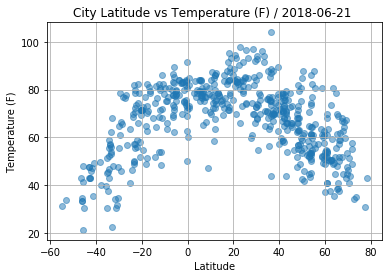

In [11]:
plt.scatter(data_df["Latitude"], data_df["Temperature F"], alpha=0.5, marker='o')
plt.title(f'City Latitude vs Temperature (F) / {date} ')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()

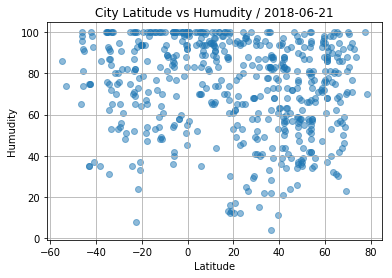

In [12]:
plt.scatter(data_df["Latitude"], data_df["Humudity"], alpha=0.5, marker='o')
plt.title(f'City Latitude vs Humudity / {date}')
plt.xlabel('Latitude')
plt.ylabel("Humudity")
plt.grid()

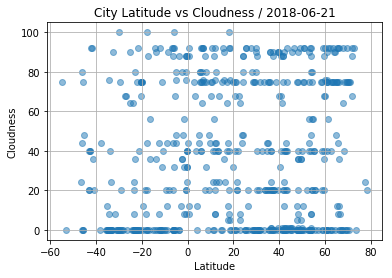

In [13]:
plt.scatter(data_df["Latitude"], data_df["Cloudness"], alpha=0.5, marker='o')
plt.title(f'City Latitude vs Cloudness / {date}')
plt.xlabel('Latitude')
plt.ylabel("Cloudness")
plt.grid()

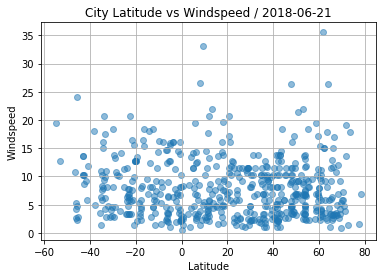

In [14]:
plt.scatter(data_df["Latitude"], data_df["Windspeed"], alpha=0.5, marker='o')
plt.title(f'City Latitude vs Windspeed / {date}')
plt.xlabel('Latitude')
plt.ylabel("Windspeed")
plt.grid()